I want to plot the loss value vs the diffusion time step to get an idea how the loss changes over the course of the diffusion process (to hopefully compensate for it in a scaling function

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plot1qbit
import glob

In [2]:
a = None
files = glob.glob("loss_vs_t_dump/*_data.npy")


for f in files[0:5000]:
    f_ = np.load(f)
    if a is not None:
        a = np.concatenate((a, f_), axis=0)
    else:
        a = f_
        
t = a[:,0]
L = a[:,1]


TypeError: 'NoneType' object is not subscriptable

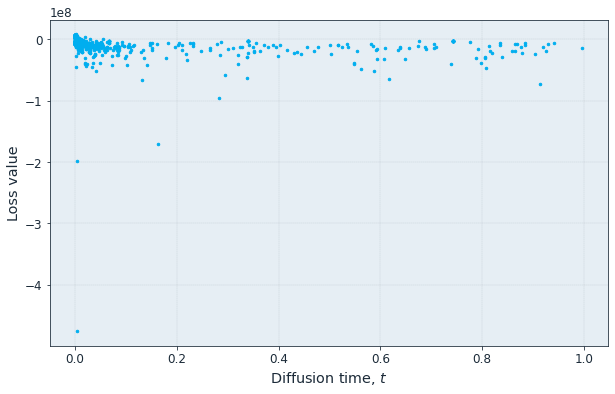

In [175]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

#ax.hist2d(x=t, y=L, bins=(100,100), norm=mpl.colors.LogNorm())
ax.plot(t, L, '.')

ax.set_xlabel("Diffusion time, $t$")
ax.set_ylabel("Loss value")


fig.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  This is separate from the ipykernel package so we can avoid doing imports until


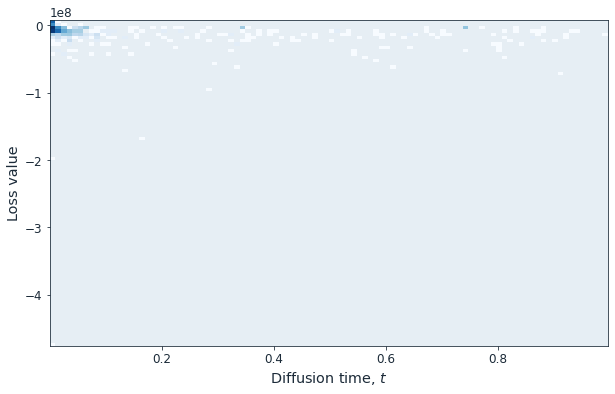

In [176]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

ax.hist2d(t, L, bins=(100,100), norm=mpl.colors.LogNorm())

ax.set_xlabel("Diffusion time, $t$")
ax.set_ylabel("Loss value")

fig.show()

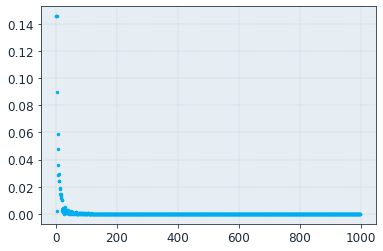

In [177]:
d = np.load("./importance_sampling_distribution.npy")
plt.plot(d, '.')

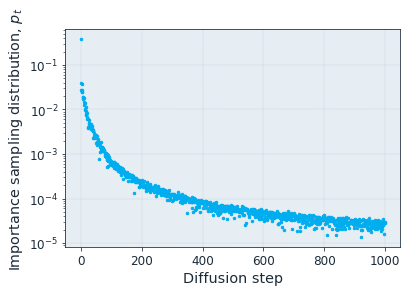

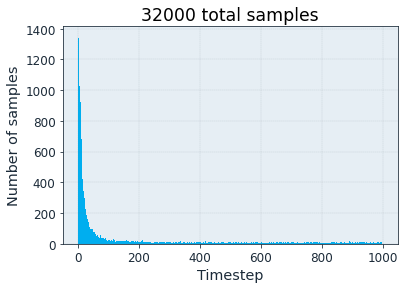

In [5]:
d = np.load("./importance_sampling_distribution.npy")
plt.semilogy(d, '.')

#t = np.linspace(0,1,num=1000)
#pt = np.exp(6*np.exp(-10.*t))
#pt = pt / np.sum(pt)
#plt.semilogy(t*1000, pt)

plt.xlabel("Diffusion step")
plt.ylabel("Importance sampling distribution, $p_t$")
plt.show()


a = None
files = glob.glob("t_sample_dump/*_t.npy")

for f in files[0:1000]:
    f_ = np.load(f)
    
    if a is not None:
        a = np.concatenate((a, f_), axis=0)
    else:
        a = f_        

plt.hist(a, bins=1000)
plt.xlabel("Timestep")
plt.ylabel("Number of samples")
plt.title(f"{a.shape[0]} total samples")
plt.show()

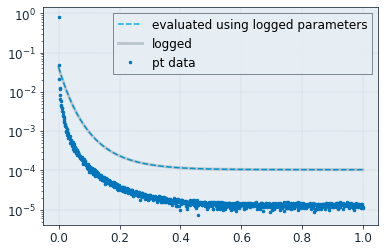

In [189]:
import h5py

with h5py.File("debug_pt.h5",'r') as F:
    a,b,c = F['params'][...]
    #a,b,c = [1,  6, -10]
    pt = F['pt'][...]
    pt_fit = F['pt_fit'][...]
    t = F['t'][...]
    
    
pt_eval = a*np.exp(b*np.exp(c*t))

plt.semilogy(t, pt_eval/np.sum(pt_eval), '--', label="evaluated using logged parameters")
plt.semilogy(t, pt_fit, linewidth=3, label="logged", alpha=0.2)
plt.semilogy(t, pt, '.', label="pt data")

plt.legend()
